# Let only_pos_reward = 1

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../policy_training_and_evaluation/estimation/0109_val_regression_summary.csv') 

In [3]:
df['ac'] = df.policy_dir.apply(lambda x: float(x.split('ac')[1].split('-gamma')[0]))
df

,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,overall_agent_reward,mean_phy_info_gains,mean_phy_action_costs,overall_phy_reward,mean_rand_info_gains,mean_rand_action_costs,overall_rand_reward,ac
0,0.243380,../models/dqn_mimic-0109_roc_curve-g1-ac1.0e-0...,0109_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.01000,1,0.000719,50.654692,-50.653974,0.001167,46.477027,-46.47586,0.001244,61.724813,-61.723569,0.01000
1,0.279748,../models/dqn_mimic-0109_roc_curve-g1-ac0.0e+0...,0109_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.00000,1,0.000806,24.185066,-24.184260,0.001167,46.477027,-46.47586,0.001244,61.724813,-61.723569,0.00000
2,0.382735,../models/dqn_mimic-0109_roc_curve-g1-ac1.0e-0...,0109_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.10000,1,0.001039,12.781139,-12.780101,0.001167,46.477027,-46.47586,0.001244,61.724813,-61.723569,0.10000
3,0.571321,../models/dqn_mimic-0109_roc_curve-g1-ac1.0e+0...,0109_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,1.00000,1,0.001262,0.241142,-0.239880,0.001167,46.477027,-46.47586,0.001244,61.724813,-61.723569,1.00000
4,0.284339,../models/dqn_mimic-0109_roc_curve-g1-ac1.0e-0...,0109_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.00001,1,0.000949,45.361349,-45.360400,0.001167,46.477027,-46.47586,0.001244,61.724813,-61.723569,0.00001
5,0.275055,../models/dqn_mimic-0109_roc_curve-g1-ac1.0e-0...,0109_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.00010,1,0.001153,36.030504,-36.029351,0.001167,46.477027,-46.47586,0.001244,61.724813,-61.723569,0.00010
6,0.451018,../models/dqn_mimic-0109_roc_curve-g1-ac1.0e-0...,0109_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.00100,1,0.000764,51.985871,-51.985107,0.001167,46.477027,-46.47586,0.001244,61.724813,-61.723569,0.00100


### Action cost have no relationship with cost/gain

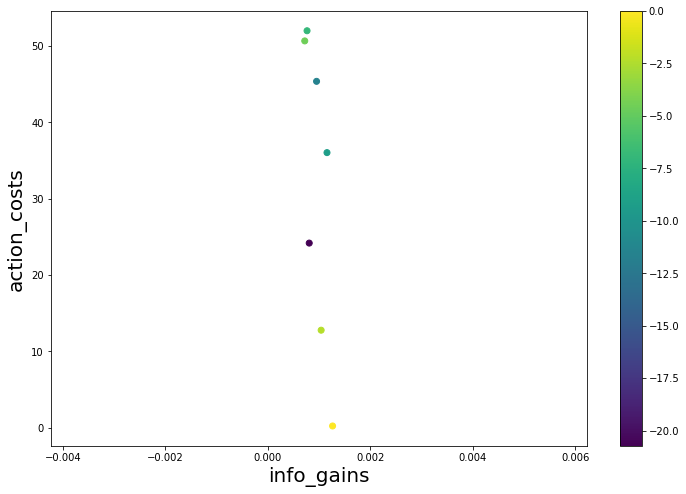

In [4]:
plt.figure(figsize=[12,8])
plt.scatter(df['mean_agent_info_gains'], df['mean_agent_action_costs'], c=np.log(df['ac'] + 1e-9))
plt.xlabel('info_gains', fontsize=20)
plt.ylabel('action_costs', fontsize=20)
plt.colorbar()
plt.show()

### Overall reward is dominated by action cost

In [6]:
selected_df = df[(df['mean_agent_info_gains'] > df['mean_phy_info_gains']) & (df['mean_agent_action_costs'] < df['mean_phy_action_costs']) ]
selected_df

,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,overall_agent_reward,mean_phy_info_gains,mean_phy_action_costs,overall_phy_reward,mean_rand_info_gains,mean_rand_action_costs,overall_rand_reward


In [7]:
selected_df['policy_dir'].values

array([], dtype=object)

## Final plot

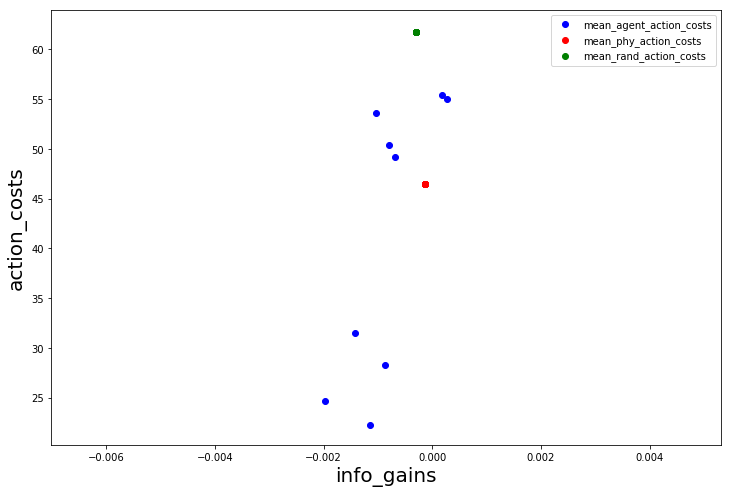

In [8]:
plt.figure(figsize=[12,8])
plt.scatter(df['mean_agent_info_gains'], df['mean_agent_action_costs'], color='b', )
plt.scatter(df['mean_phy_info_gains'], df['mean_phy_action_costs'], color='r')
plt.scatter(df['mean_rand_info_gains'], df['mean_rand_action_costs'], color='g')
plt.legend(loc='best')
plt.xlabel('info_gains', fontsize=20)
plt.ylabel('action_costs', fontsize=20)
plt.show()

,test_loss,policy_dir,identifier,reward_estimator_dir,cache_dir,action_cost_coef,gain_coef,mean_agent_info_gains,mean_agent_action_costs,overall_agent_reward,mean_phy_info_gains,mean_phy_action_costs,overall_phy_reward,mean_rand_info_gains,mean_rand_action_costs,overall_rand_reward,ac
0,0.206334,../models/dqn_mimic-0108_roc_curve-g1-ac1.0e-0...,0108_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.00010,1,-0.000798,50.403968,-50.404767,-0.00014,46.477027,-46.477167,-0.000305,61.724813,-61.725118,0.00010
1,0.197473,../models/dqn_mimic-0108_roc_curve-g1-ac1.0e-0...,0108_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.00100,1,-0.001416,31.501590,-31.503006,-0.00014,46.477027,-46.477167,-0.000305,61.724813,-61.725118,0.00100
2,0.338502,../models/dqn_mimic-0108_roc_curve-g1-ac0.0e+0...,0108_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.00000,1,-0.001975,24.652147,-24.654121,-0.00014,46.477027,-46.477167,-0.000305,61.724813,-61.725118,0.00000
3,0.327781,../models/dqn_mimic-0108_roc_curve-g1-ac1.0e-0...,0108_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.01000,1,-0.001037,53.574887,-53.575923,-0.00014,46.477027,-46.477167,-0.000305,61.724813,-61.725118,0.01000
4,0.281003,../models/dqn_mimic-0108_roc_curve-g1-ac1.0e-0...,0108_,../models/rew_m_normal1217-hl1-hu512-lr1e-06-r...,../RL_exp_cache/1128-30mins-24hrs-20order-rnn-...,0.00001,1,0.000178,55.417743,-55.417565,-0.00014,46.477027,-46.477167,-0.000305,61.724813,-61.725118,0.00001


TypeError: You must first set_array for mappable

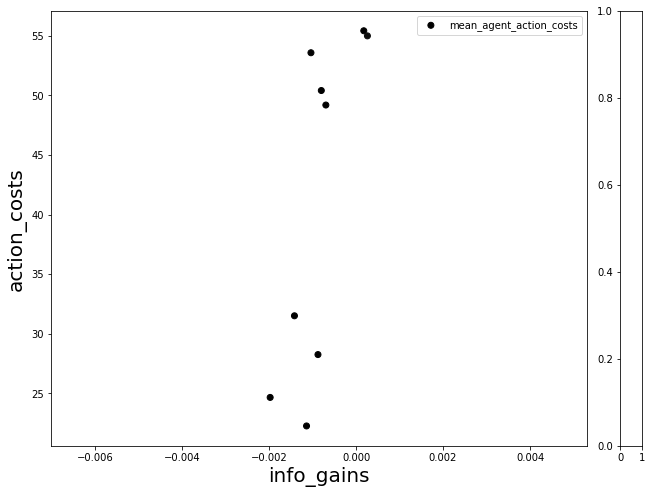

In [23]:
plt.figure(figsize=[12,8])
plt.scatter(df['mean_agent_info_gains'], df['mean_agent_action_costs'], color=df.ac)
# plt.scatter(df['mean_phy_info_gains'], df['mean_phy_action_costs'], color='r')
# plt.scatter(df['mean_rand_info_gains'], df['mean_rand_action_costs'], color='g')
plt.legend(loc='best')
plt.xlabel('info_gains', fontsize=20)
plt.ylabel('action_costs', fontsize=20)
plt.show()